# Exercise session nº 2
---
# Sonic Hedgehog Signaling Gradient Readout in the Vertebrate Neural Tube

__*Sacha Ichbiah, 31/01/22, ENS Paris*__

This subject is extracted from : 
> N. Balaskas et Al., *Gene Regulatory Logic for Reading the Sonic Hedgehog Signaling Gradient in the Vertebrate Neural Tube*, Cell, 2012.
> https://doi.org/10.1016/j.cell.2011.10.047

Secreted signals, known as morphogens, provide the positional information that organizes gene expression and cellular differentiation in many developing tissues. In the vertebrate neural tube, Sonic Hedgehog (Shh) acts as a morphogen to control the pattern of neuronal subtype specification. However, it was not clear how Shh gradient were interpreted by the cell to induce different cell fates. This article shows that a spatially and temporally changing gradient of Shh signaling is interpreted by the regulatory logic of a downstream transcriptional network. The design of the network, which links three transcription factors to Shh signaling, is responsible for differential spatial and temporal gene expression. In addition, the network renders cells insensitive to fluctuations in signaling and confers hysteresis - memory of the signal. The morphogen interpretation is an emergent property of the architecture of a transcriptional network that provides robustness and reliability to tissue patterning.

![alt text](Images/Graphical_abstract.jpeg "Title")

During this session, we will model the gene regulation network using differential equations and observe the behaviour induced by the architecture of this network. 

---

## I - Temporal evolution of the GRN : 

![alt text](Images/GRN.png "Title")

The relations between these proteins can be modeled as such : 

$
\begin{align}
\frac{dP}{dt} &=\frac{\alpha}{1 + (\frac{N}{N_{critP}})^{h_1} +  (\frac{O}{O_{critP}})^{h_2}  } - k_1P \newline
\frac{dO}{dt} &=\frac{\beta G}{1 + G} \frac{1}{1 + (\frac{N}{N_{critO}})^{h_3}  } - k_2O \newline
\frac{dN}{dt} &=\frac{\gamma G}{1 + G} \frac{1}{1 + (\frac{O}{O_{critN}})^{h_4} + (\frac{P}{P_{critN}})^{h_5}  } - k_3N \newline
\end{align}
$

#### **Question 1 :**
> Discretize these differential equations with a forward euler-scheme

__*Correction*__ : 

$
\begin{align}
P(t+dt) &= P(t)(1-k_1dt) + dt \frac{\alpha}{1 + (\frac{N(t)}{N_{critP}})^{h_1} +  (\frac{O(t)}{O_{critP}})^{h_2}  } \newline
O(t+dt) &= O(t)(1-k_2dt) + dt \frac{\beta G}{1 + G} \frac{1}{1 + (\frac{N(t)}{N_{critO}})^{h_3}  }   \newline
N(t+dt) &= N(t)(1-k_3dt) + dt \frac{\gamma G}{1 + G} \frac{1}{1 + (\frac{O(t)}{O_{critN}})^{h_4} + (\frac{P(t)}{P_{critN}})^{h_5}  } \newline
\end{align}
$


#### **Question 2 :**
> Integrate these equations for the given parameters. Try with G $\in [1,2,3,4,5]$ What do you observe ? 

In [4]:
alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1
n = 1 
m = 1

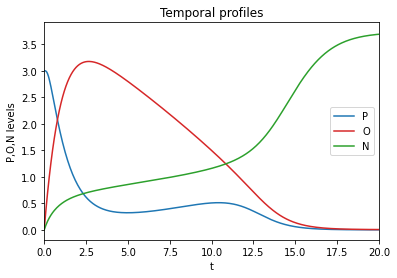

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
tfinal = 50
npoints = 1000
timepoints = np.linspace(0,tfinal,npoints)
G=3
P=np.zeros(npoints)
O=np.zeros(npoints)
N=np.zeros(npoints)

dt = timepoints[1]-timepoints[0]


for t in range(npoints):
    if t==0 : 
        P[t]=3
        continue
        
    P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
    O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1+N[t-1]**h3)
    N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

plt.plot(timepoints,P,color='tab:blue',label='P')
plt.plot(timepoints,O,color='tab:red',label='O')
plt.plot(timepoints,N,color='tab:green',label='N')
plt.title("Temporal profiles")
plt.xlabel("t")
plt.xlim(0,20)
plt.ylabel("P,O,N levels")
plt.legend()

## II - Phase diagram of the GRN : 

#### **Question 3 :**
> Plot the phase diagram of the steady states values of P,O and D for G $\in G_{vals}$. Then plot the phase diagram for $\alpha = 0, \beta=0 \text{ and } (\alpha,\beta)=0$

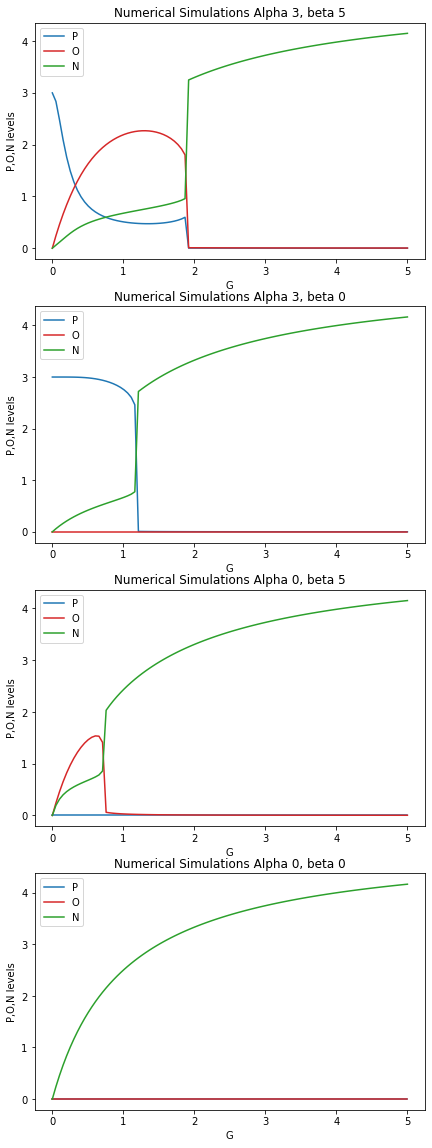

In [96]:
n_gvals = 100
Gvals = np.linspace(0,5,n_gvals)
Ps = np.zeros(n_gvals)
Os = np.zeros(n_gvals)
Ns = np.zeros(n_gvals)


alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1
n = 1 
m = 1

P=np.zeros(n_gvals)
O=np.zeros(npoints)
N=np.zeros(npoints)

dt = timepoints[1]-timepoints[0]

fig,ax =plt.subplots(4,1,figsize=(7,20))

dictparams ={"Alpha 3, beta 5":(3,5),"Alpha 3, beta 0":(3,0),"Alpha 0, beta 5":(0,5),"Alpha 0, beta 0":(0,0)}
for n,key in enumerate(dictparams.keys()) :
    alpha,beta = dictparams[key]
    for i,G in enumerate(Gvals) : 
        tfinal = 50
        npoints = 10000
        timepoints = np.linspace(0,tfinal,npoints)

        P=np.zeros(npoints)
        O=np.zeros(npoints)
        N=np.zeros(npoints)

        for t in range(npoints):
            if t==0 : 
                P[t]=3
                continue

            P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
            O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1+N[t-1]**h3)
            N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

        Ps[i]=P[-1]
        Os[i]=O[-1]
        Ns[i]=N[-1]

    ax[n].plot(Gvals,Ps,color='tab:blue',label='P')
    ax[n].plot(Gvals,Os,color='tab:red',label='O')
    ax[n].plot(Gvals,Ns,color='tab:green',label='N')
    ax[n].set_title("Numerical Simulations "+key)
    ax[n].set_xlabel("G")
    ax[n].set_ylabel("P,O,N levels")
    ax[n].legend()

## III - Noise buffering by the GRN : 
#### **Question 4 :**
> Compare the temporal evolution with $G = 5$ to the one with $G \mapsto \mathcal{N}(5,1)$, a normal law of mean 5 and of variance 1.  What are the effects of the noise on the proteins concentrations ? 

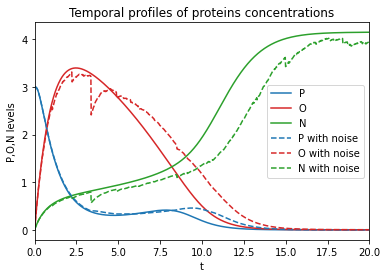

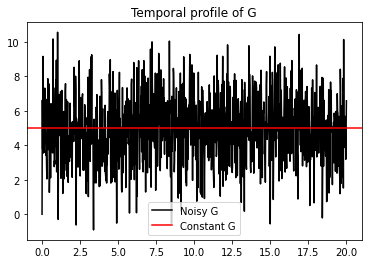

In [89]:
alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1
n = 1 
m = 1

G_mean = 5
G_std = 1


import numpy as np 
import matplotlib.pyplot as plt
tfinal = 20
npoints = 1000
timepoints = np.linspace(0,tfinal,npoints)
P=np.zeros(npoints)
O=np.zeros(npoints)
N=np.zeros(npoints)

dt = timepoints[1]-timepoints[0]


for t in range(npoints):
    if t==0 : 
        P[t]=3
        continue
        
    G = G_mean
        
    P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
    O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1+N[t-1]**h3)
    N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

plt.plot(timepoints,P,color='tab:blue',label='P')
plt.plot(timepoints,O,color='tab:red',label='O')
plt.plot(timepoints,N,color='tab:green',label='N')
plt.title("Temporal profiles")
plt.xlabel("t")
plt.xlim(0,20)
plt.ylabel("P,O,N levels")
plt.legend()
Gsnoise = np.zeros(npoints)

for t in range(npoints):
    if t==0 : 
        P[t]=3
        continue
        
    G = np.random.normal(G_mean,G_std*2)
    Gsnoise[t]=G
        
    P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
    O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1+N[t-1]**h3)
    N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

plt.plot(timepoints,P,color='tab:blue',label='P with noise',linestyle = '--')
plt.plot(timepoints,O,color='tab:red',label='O with noise',linestyle ='--')
plt.plot(timepoints,N,color='tab:green',label='N with noise',linestyle = '--')
plt.title("Temporal profiles of proteins concentrations")
plt.xlabel("t")
plt.xlim(0,20)
plt.ylabel("P,O,N levels")
plt.legend()

plt.figure()
plt.plot(timepoints,Gsnoise,label = 'Noisy G',color='k')
plt.axhline(y=5,label = "Constant G", color = 'r')
plt.title("Temporal profile of G")
plt.legend()

## IV - Hysteresis
#### **Question 5 :**
> From the steady state at G = 0, make G evolve slowly such that the steady state is reached at each variation of G. Then when G = 5, make G decrease back to zero. what do you observe ? 

Text(0, 0.5, 'N levels')

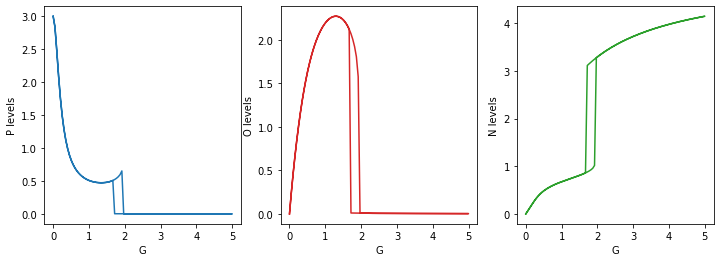

In [109]:
n_gvals = 100
Gvals = np.hstack((np.linspace(0,5,n_gvals)[:-1],np.linspace(5,0,n_gvals)))
Ps = np.zeros(n_gvals*2-1)
Os = np.zeros(n_gvals*2-1)
Ns = np.zeros(n_gvals*2-1)


alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1
n = 1 
m = 1



dt = timepoints[1]-timepoints[0]

for i,G in enumerate(Gvals) : 
    tfinal = 50
    npoints = 100
    timepoints = np.linspace(0,tfinal,npoints)

    P=np.zeros(npoints)
    O=np.zeros(npoints)
    N=np.zeros(npoints)

    for t in range(npoints):
        if t==0 : 
            if i == 0:
                P[t]=3
            else :
                P[t]=Ps[i-1]
            continue

        P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
        O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1+N[t-1]**h3)
        N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

    Ps[i]=P[-1]
    Os[i]=O[-1]
    Ns[i]=N[-1]

fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].plot(Gvals,Ps,color='tab:blue',label='P')
axs[0].set_xlabel("G")
axs[0].set_ylabel("P levels")

axs[1].plot(Gvals,Os,color='tab:red',label='O')
axs[1].set_xlabel("G")
axs[1].set_ylabel("O levels")

axs[2].plot(Gvals,Ns,color='tab:green',label='N')
axs[2].set_xlabel("G")
axs[2].set_ylabel("N levels")

# Conclusion 

The proposed model provides evidence that Shh morphogen interpretation in the neural tube is a property of the downstream GNN. Cells transform the extracellular gradient of Shh into a dynamic profile of intracellular Gli activity that engages a transcriptional circuit, the regulatory logic of which is responsible for the generation of the characteristic temporal and spatial patterns of gene
expression. This mechanism offers a powerful strategy to achieve the characteristic precision and robustness of morphogen-mediated pattern formation.

In the following of the article, the authors introduce another model, extending the preceding one by taking into account a forth protein, Gli. It allows them to reproduce the behaviours observed in their in-vivo experiments. 

On top of explaining the variable spatial patterns of gene expression, the networks confers both robustness and hysteresis of protein production. The insensitivity of the circuit to transient changes in the level of signaling provides a means to achieve reliable patterning despite the inherent noisiness of development.

The study highlights the information-processing power of transcriptional networks and the simplicity and adaptability of this mechanism suggest that it is likely to be relevant for the control of patterning of tissues other than the neural tube.

_Additional references :_
> Eric H. Davidson, *Emerging properties of animal gene regulatory networks*, Nature, 2010. https://doi.org/10.1038/nature09645

> Eric H. Davidson, Samuel Levine *Properties of developmental gene regulatory networks*, PNAS, 2008 https://doi.org/10.1073/pnas.0806007105

> Lewis Wolpert, *Positional information and the spatial pattern of cellular differentiation*, Journal of Theoretical Biology, 1969. https://doi.org/10.1016/S0022-5193(69)80016-0